In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display

In [266]:
df=pd.read_csv(r"Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [268]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [269]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [270]:
df.fillna(df["TotalCharges"].mean(),inplace=True)

In [271]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=df[col].str.lower().str.replace(' ','_')
df        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,yes


In [272]:
df["Churn"]=(df["Churn"]=='yes').astype('int32')
global_mean=df["Churn"].mean()
global_mean

0.2653698707936959

In [273]:
objects=df.select_dtypes("object").columns.drop("customerID","Churn")
for col in objects:
    d_groub=df.groupby(col).Churn.agg(["mean"])
    d_groub["diff"]=d_groub["mean"]-global_mean
    display(d_groub)


,mean,diff
gender,,
female,0.269209,0.003839
male,0.261603,-0.003766


,mean,diff
Partner,,
no,0.329580,0.064210
yes,0.196649,-0.068721


,mean,diff
Dependents,,
no,0.312791,0.047422
yes,0.154502,-0.110868


,mean,diff
PhoneService,,
no,0.249267,-0.016103
yes,0.267096,0.001726


,mean,diff
MultipleLines,,
no,0.250442,-0.014927
no_phone_service,0.249267,-0.016103
yes,0.286099,0.020729


,mean,diff
InternetService,,
dsl,0.189591,-0.075779
fiber_optic,0.418928,0.153558
no,0.074050,-0.191320


,mean,diff
OnlineSecurity,,
no,0.417667,0.152297
no_internet_service,0.074050,-0.191320
yes,0.146112,-0.119258


,mean,diff
OnlineBackup,,
no,0.399288,0.133918
no_internet_service,0.074050,-0.191320
yes,0.215315,-0.050055


,mean,diff
DeviceProtection,,
no,0.391276,0.125906
no_internet_service,0.074050,-0.191320
yes,0.225021,-0.040349


,mean,diff
TechSupport,,
no,0.416355,0.150985
no_internet_service,0.074050,-0.191320
yes,0.151663,-0.113706


,mean,diff
StreamingTV,,
no,0.335231,0.069861
no_internet_service,0.074050,-0.191320
yes,0.300702,0.035332


,mean,diff
StreamingMovies,,
no,0.336804,0.071434
no_internet_service,0.074050,-0.191320
yes,0.299414,0.034044


,mean,diff
Contract,,
month-to-month,0.427097,0.161727
one_year,0.112695,-0.152675
two_year,0.028319,-0.237051


,mean,diff
PaperlessBilling,,
no,0.163301,-0.102069
yes,0.335651,0.070281


,mean,diff
PaymentMethod,,
bank_transfer_(automatic),0.167098,-0.098271
credit_card_(automatic),0.152431,-0.112939
electronic_check,0.452854,0.187484
mailed_check,0.191067,-0.074303


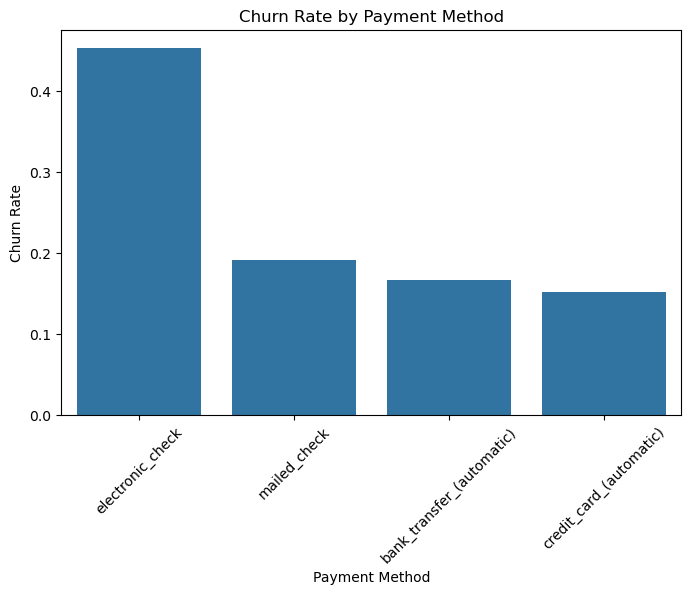

In [274]:
churn_by_payment = df.groupby("PaymentMethod").Churn.mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()

In [275]:
contract_churn = df.groupby(["PaymentMethod", "Contract"]).Churn.mean().unstack()
print(contract_churn)

Contract                   month-to-month  one_year  two_year
PaymentMethod                                                
bank_transfer_(automatic)        0.341256  0.097187  0.033688
credit_card_(automatic)          0.327808  0.103015  0.022375
electronic_check                 0.537297  0.184438  0.077381
mailed_check                     0.315789  0.068249  0.007853


<Figure size 1000x600 with 0 Axes>

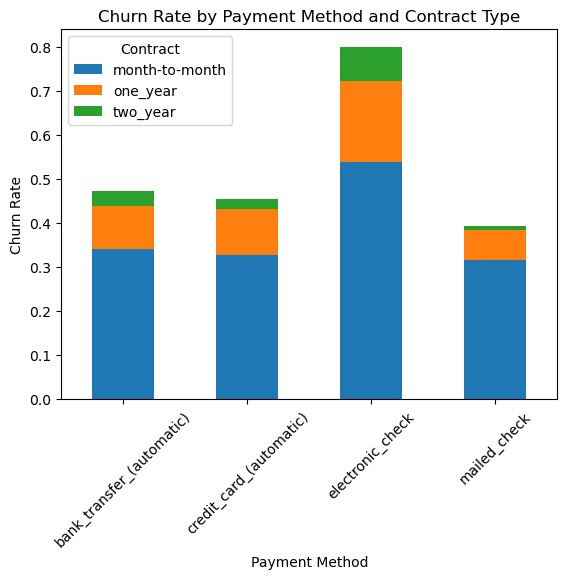

In [276]:
# there are a 53% of customers there contract month to month with electronic check payment method ar more likely to churn! 

plt.figure(figsize=(10, 6))
contract_churn.plot(kind="bar", stacked=True)
plt.title("Churn Rate by Payment Method and Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()

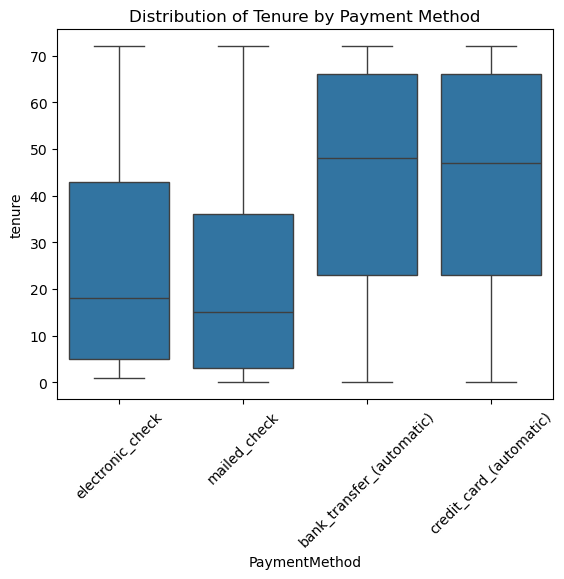

In [277]:
sns.boxplot(x="PaymentMethod", y="tenure", data=df)
plt.title("Distribution of Tenure by Payment Method")
plt.xticks(rotation=45)
plt.show()

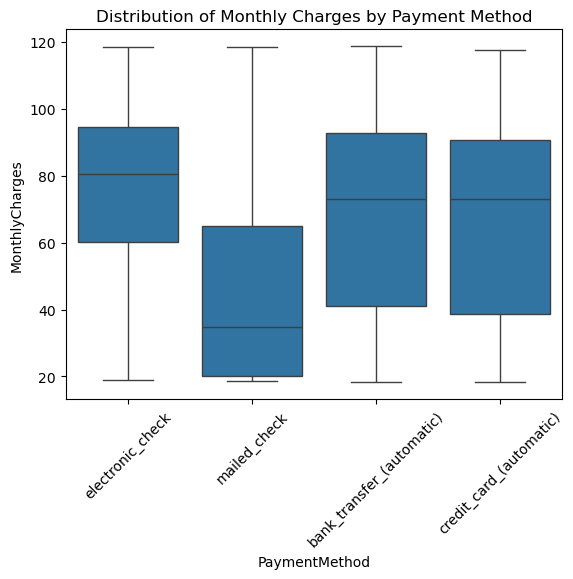

In [278]:
sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df)
plt.title("Distribution of Monthly Charges by Payment Method")
plt.xticks(rotation=45)
plt.show()

In [279]:
internet_service_churn = df.groupby(["PaymentMethod", "InternetService"]).Churn.mean().unstack()
print(internet_service_churn)

InternetService                 dsl  fiber_optic        no
PaymentMethod                                             
bank_transfer_(automatic)  0.093640     0.289474  0.054217
credit_card_(automatic)    0.121212     0.252931  0.027190
electronic_check           0.319444     0.532288  0.122951
mailed_check               0.207178     0.426357  0.095816


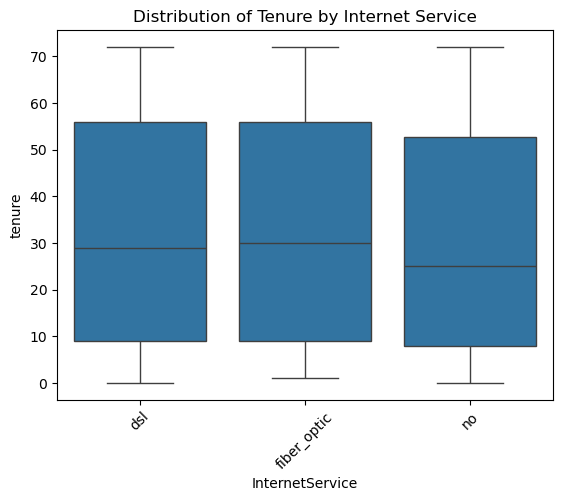

In [280]:
sns.boxplot(x="InternetService", y="tenure", data=df)
plt.title("Distribution of Tenure by Internet Service")
plt.xticks(rotation=45)
plt.show()

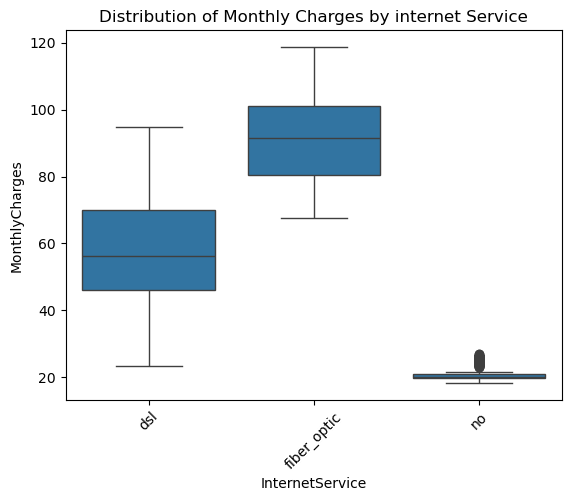

In [281]:
sns.boxplot(x="InternetService", y="MonthlyCharges", data=df)
plt.title("Distribution of Monthly Charges by internet Service")
plt.xticks(rotation=45)
plt.show()

Feature Engineering

In [282]:
df['internet'] = np.where(df.InternetService != 'no' , 'yes' , 'no')
df["num_of_services"] =  (df[['PhoneService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
'TechSupport', 'StreamingTV','StreamingMovies', 'internet']] == 'yes').sum(axis=1)

In [283]:
groub=df.groupby(df.num_of_services).Churn.agg(["mean"])
groub["diff"]=groub["mean"]-global_mean
display(groub)

,mean,diff
num_of_services,,
1,0.092154,-0.173215
2,0.515818,0.250449
3,0.434739,0.169369
4,0.346782,0.081412
5,0.272128,0.006758
6,0.220073,-0.045297
7,0.125714,-0.139656
8,0.057915,-0.207455


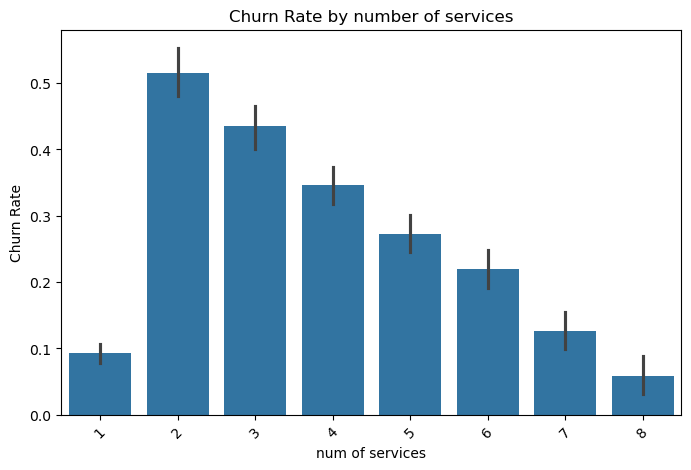

In [284]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['num_of_services'], y=df['Churn'])
plt.title("Churn Rate by number of services")
plt.ylabel("Churn Rate")
plt.xlabel("num of services")
plt.xticks(rotation=45)
plt.show()

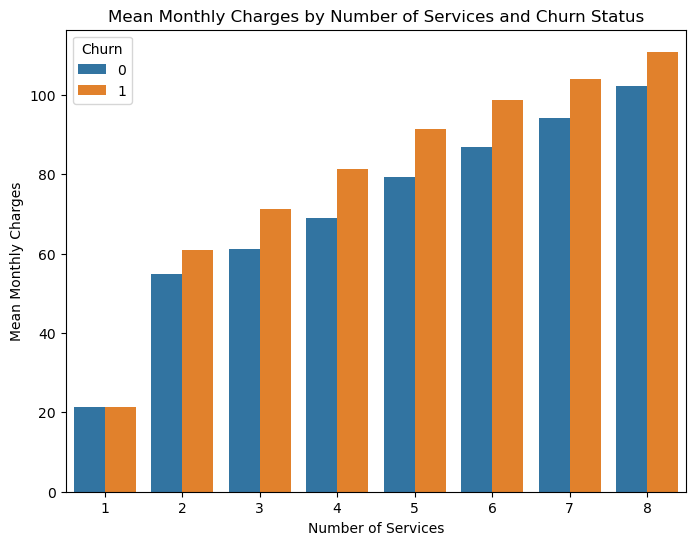

In [285]:
grouped_data = df.groupby(['num_of_services', 'Churn'])['MonthlyCharges'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='num_of_services', y='MonthlyCharges', hue='Churn', data=grouped_data)

plt.title('Mean Monthly Charges by Number of Services and Churn Status')
plt.xlabel('Number of Services')
plt.ylabel('Mean Monthly Charges')
plt.legend(title='Churn')
plt.show()


In [286]:
# we can see difference in Average Monthly Charges of Churn Customers to Customers who keep the services

df.groupby('Churn')['MonthlyCharges'].sum()

Churn
0    316985.75
1    139130.85
Name: MonthlyCharges, dtype: float64

In [287]:
(139130.85/(316985.75 + 139130.85))*100

30.503351555282137

In [288]:
#despite the  the churn represents 26.5% of total customers,
#but when we consider Monthly Charges we can see that the ratio is 31% of total revenue was "lost" by people who left.
#let's see total chareges for better understanding 
df.groupby('Churn')['TotalCharges'].sum()

Churn
0    1.321836e+07
1    2.862927e+06
Name: TotalCharges, dtype: float64

In [289]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
0    2554.765772
1    1531.796094
Name: TotalCharges, dtype: float64

In [290]:
# We can note that churn customers has lower values in Total Charges
# Let's check tenure feature.
df.groupby('Churn')['tenure'].mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

<Axes: >

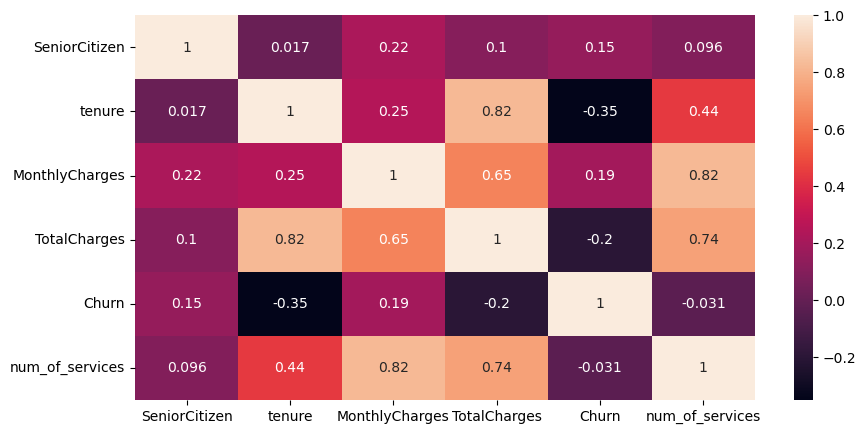

In [291]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [292]:
df.drop(["customerID","TotalCharges", "gender","Dependents","PhoneService","MultipleLines","StreamingMovies","internet",""], axis=1, inplace=True)

KeyError: "[''] not found in axis"

In [261]:
categ=df.select_dtypes("object").columns
df=pd.get_dummies(df,columns=categ)

In [262]:
df

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_no,Partner_yes,InternetService_dsl,InternetService_fiber_optic,InternetService_no,OnlineSecurity_no,...,StreamingTV_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaperlessBilling_no,PaperlessBilling_yes,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,29.85,0,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,0,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,1,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,0,True,False,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,1,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,False,True,True,False,False,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,0,False,True,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,0,False,True,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,1,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


In [263]:
x = df.drop(["Churn"], axis=1)
y = df["Churn"]
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(solver="saga",penalty='l1')
model.fit(x_scaled , y_train)
model.score(x_scaled, y_train)

0.8035143769968051

In [264]:
model.score(x_test, y_test)

c:\Users\Town Tech\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.758694109297374